<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6103_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive 
drive.mount('/content/drive')

import os

os.chdir(r'/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/')

Mounted at /content/drive


In [8]:
# uci.py

import numpy as np
import pandas as pd

def iris():
    path = 'datasets/iris.csv'
    names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
    df = pd.read_csv(path, names=names,index_col=False)
    df = df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2]).values
    x = df[:, :4].astype(np.float16)
    y = df[:, 4].astype(np.uint8)

    return x, y

def adult():
    path = 'datasets/adult.csv'
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
    df = pd.read_csv(path, names=names, index_col=False)
    df = df.applymap(lambda x: x.strip() if type(x) is str else x)

    for col in df:
        if df[col].dtype == 'object':
            df = df[df[col] != '?']

    replace = [
        ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay',
         'Never-worked'],
        ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th',
         '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'],
        ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent',
         'Married-AF-spouse'],
        ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty',
         'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving',
         'Priv-house-serv', 'Protective-serv', 'Armed-Forces'],
        ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'],
        ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],
        ['Female', 'Male'],
        ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)',
         'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland',
         'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador',
         'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia',
         'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'],
        ['>50K', '<=50K']
    ]

    for row in replace:
        df = df.replace(row, range(len(row)))
    
    df = df.values
    x = df[:, :14].astype(np.uint32)
    y = df[:, 14].astype(np.uint8)

    return x, y

def wine():
    path = 'datasets/wine.csv'
    names = ['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
             'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline']
    df = pd.read_csv(path, names=names, index_col=False).values
    x = df[:, 1:].astype(np.float16)
    y = df[:, 0].astype(np.uint8)

    return x, y

def car_eval():
    path = 'datasets/car_eval.csv'
    names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
    df = pd.read_csv(path, names=names, index_col=False)
    replace = [
        ['low', 'med', 'high', 'vhigh'],
        ['small', 'med', 'big'],
        ['low', 'med', 'high'],
        ['unacc', 'acc', 'good', 'vgood']
    ]

    for row in replace:
        df = df.replace(row, range(len(row)))

    df = df.replace({'doors': {'5more': 5}, 'persons': {'more': 6}})
    df.doors = df.doors.apply(lambda x: int(x) - 2)
    df.persons = df.persons.apply(lambda x: (int(x) // 2) - 1)
    df = df.values.astype(np.uint8)
    X = df[:, :6]
    y = df[:, 6]

    return X, y


In [19]:
# iris()
# adult()
# wine()
# car_eval()

# Multi-class classification

Softmax regression(aka multinomial logistic regresssion) is a generalisation of logistic regression that handles multi-class classification. when number of classes is 2, softmax regression reduces to logistic regression.

## Softmax function 
$\sigma(z) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

where $K$ is number of classes.

\

<img src="https://miro.medium.com/max/4800/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" alt="drawing" width="300"/>

## UCI Datataset
1. [Iris](https://archive.ics.uci.edu/ml/datasets/Iris): Classify into 3 classes based on 4 attributes; 150 examples.
2. [Adult](https://archive.ics.uci.edu/ml/datasets/Adult): Classify whether income exceeds $50K/yr using 14 attributes; 48842 examples.
3. [Wine](https://archive.ics.uci.edu/ml/datasets/Wine): Classify 3 different cultivars based on 13 attributes; 178 examples.

## Content
1. Import libraries
2. Prepare dataset
3. Training hyperparameters
4. Dataloader
4. Model
5. Training
6. Visualisation 

In [20]:
from google.colab import drive 
drive.mount('/content/drive')
# modify the following path accordingly
%cd '/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/'
%ls -lah './'
%ls '/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab
total 72K
drwx------ 2 root root 4.0K Sep  4 04:45 datasets/
-rw------- 1 root root  64K Sep  4 04:42 LogisticRegression.ipynb
-rw------- 1 root root 3.2K Sep  4 04:44 uci.py
adult.csv  iris.csv  wine.csv


# Import libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from uci import iris, adult, wine # these functions load the datasets as Pandas Dataframes
%matplotlib inline


# Prepare dataset 

In [13]:
# Dataset (choose from iris, adult or wine)
dataset = 'iris'
dataset_fn = {'iris': iris(), 'adult': adult(), 'wine': wine()}
X, y, df = dataset_fn[dataset]

df.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

# for simplicity, here we are splitting the data into the training set and the test set. Rigorous model selection requires splitting into three sets, training, validation, and test.
# To do that, apply train_test_split once again on X_train and y_train

print('Number of features: ', num_features)
print('Number of training examples: ', X_train.shape[0])
print('Number of testing examples : ', X_test.shape[0])

# Normalization to zero mean and unit standard deviation
print("before normalization: mean = " + str(X_train.sum(axis=0)) + " std = " + str(X_train.std(axis=0)))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("after normalization: mean = " + str(X_train.sum(axis=0))+ " std = " + str(X_train.std(axis=0)))

# apply the feature-level mean and std from the training set 
X_test = scaler.transform(X_test)


Number of features:  4
Number of training examples:  105
Number of testing examples :  45
before normalization: mean = [616.5 319.2 393.8 126.1] std = [0.856  0.4524 1.795  0.763 ]
after normalization: mean = [ 0.00586  -0.00403  -0.003906  0.      ] std = [0.9985 1.     0.9995 0.997 ]


# Setting hyperparameters for training

In [15]:
batch_size = 16
num_epochs = 100
leaning_rate = 0.4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Current device:', device)

Current device: cuda


# Dataloader 

In [16]:
# Convert to pytorch tensor 
X_train_tensor = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train_tensor = torch.from_numpy(y_train).type(torch.LongTensor)
X_test_tensor = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)

# Pytorch train and test sets
train = TensorDataset(X_train_tensor, y_train_tensor)
test = TensorDataset(X_test_tensor, y_test_tensor)

# Data loader 
train_loader = DataLoader(train, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle=False)
# You should always shuffle the training dataset.
# Insufficient shuffling leads to biased estimates of the gradient!
# Shuffling the test set does not affect performance. 

# Model 

In [17]:
class SoftmaxRegression(nn.Module):
    def __init__(self, num_features,num_classes):
        super().__init__()
        self.linear = nn.Linear(num_features, num_classes) # this is a fully connected layer

    def forward(self, x):
        out = self.linear(x) # the outputs are the logits. This is expected by CrossEntropyLoss
        return out


In [20]:
# Create model 
model = SoftmaxRegression(num_features, num_classes).to(device)
print('Model: ', model)
# Cross entropy loss
criterion = nn.CrossEntropyLoss().to(device)

# Optimizer 
# optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
# this is SGD without momentum.

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=leaning_rate)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 60, eta_min=0)
# Cosine decay for the learning rate

Model:  SoftmaxRegression(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)


# Training 

In [22]:
def train_func(model, optimizer, criterion, train_loader,device, epoch):
    train_loss_ = 0
    correct_train = 0
    total_train = 0

    for i, (train_samples, labels) in enumerate(train_loader):
        train_samples = train_samples.to(device)
        labels = labels.to(device)

        # Forward pass 
        outputs = model(train_samples)

        # Calculate softmax and cross entropy loss
        loss = criterion(outputs, labels)

        # Compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate train accuracy
        _, predicted = torch.max(outputs, dim=1)

        # Accumulate train loss and acc for monitoring
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum()
        train_loss_ += loss*labels.size(0)

    scheduler.step()
    # store train loss and acc
    train_loss = (train_loss_/total_train).item()
    train_acc = (correct_train/total_train).item()

    return train_loss, train_acc

In [23]:
def eval(model, criterion, test_loader, device):
    test_loss_ = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for test_samples, test_labels in test_loader:
            test_samples = test_samples.to(device)
            test_labels = test_labels.to(device)
            test_outputs = model(test_samples)
            loss = criterion(test_outputs, test_labels)
            _, test_predicted = torch.max(test_outputs, dim=1)

            # Accumulate test loss and acc for monitoring
            total_test += test_labels.size(0)
            correct_test += (test_predicted == test_labels).sum()
            test_loss_ += loss*test_labels.size(0)

        test_loss = (test_loss_/total_test).item()
        test_acc = (correct_test/total_test).item()

    return test_loss, test_acc


In [24]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(num_epochs):
    train_loss_, train_acc_ = train_func(model, optimizer, criterion, train_loader, device, epoch)
    test_loss_, test_acc_ = eval(model, criterion, test_loader, device)
    if epoch%5 == 0:
        print('Epoch: {}, Train loss: {:.4f}, Test loss: {:.4f}, Train acc: {:.4f}, \
        Test acc: {:.4f}'.format(epoch, train_loss_, test_loss_, train_acc_, test_acc_))
    train_loss.append(train_loss_)
    test_loss.append(test_loss_)
    train_acc.append(train_acc_)
    test_acc.append(test_acc_)

Epoch: 0, Train loss: 0.5736, Test loss: 0.3943, Train acc: 0.7143,         Test acc: 0.8444
Epoch: 5, Train loss: 0.0986, Test loss: 0.0729, Train acc: 0.9524,         Test acc: 0.9778
Epoch: 10, Train loss: 0.0770, Test loss: 0.0651, Train acc: 0.9619,         Test acc: 1.0000
Epoch: 15, Train loss: 0.0717, Test loss: 0.0618, Train acc: 0.9810,         Test acc: 0.9778
Epoch: 20, Train loss: 0.0681, Test loss: 0.0624, Train acc: 0.9714,         Test acc: 0.9778
Epoch: 25, Train loss: 0.0653, Test loss: 0.0532, Train acc: 0.9714,         Test acc: 1.0000
Epoch: 30, Train loss: 0.0646, Test loss: 0.0493, Train acc: 0.9714,         Test acc: 1.0000
Epoch: 35, Train loss: 0.0638, Test loss: 0.0516, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 40, Train loss: 0.0629, Test loss: 0.0500, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 45, Train loss: 0.0627, Test loss: 0.0483, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 50, Train loss: 0.0624, Test loss: 0.0485, Train acc: 0

# Visualization

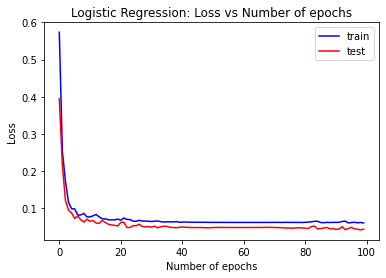

In [25]:
plt.plot(range(len(train_loss)), train_loss, 'b')
plt.plot(range(len(test_loss)), test_loss, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

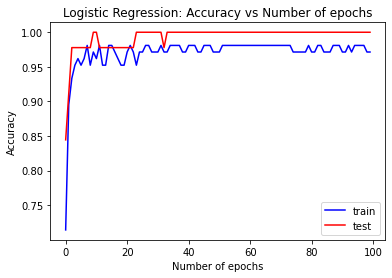

In [26]:
plt.plot(range(len(train_acc)), train_acc, 'b')
plt.plot(range(len(test_acc)), test_acc, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

### References/Resources
1. https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook
2. [Softmax activation](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60)